# <center> R1.04 Méthodes d'optimisation <br> TP1c - Régression linéaire </center>
<center> 2022/2023 - Thibault Godin & Lucie Naert </center>
<center> IUT de Vannes, BUT Informatique </center>


Le but de ce TP est d'appliquer les méthodes de gradient sur un exemple important en machine learning : la regression linéaire.

In [1]:
import numpy as np
from ipywidgets import interact, fixed

# Affichage graphique

#%matplotlib notebook 
# enable interactivity of plots
# attention a bien fermer les fenetres plt après chaque visualisalgèbreation

%matplotlib inline


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

cmap_reversed = plt.cm.get_cmap('RdBu_r')

## Régression linéaire





Le but de cette partie est d'effectuer une **régression linéaire**, c'est-à-dire d'approcher nos données à l'aide d'une fonction affine. On utilisera la descente de gradient et le package Python *numpy*.

Notre premier exemple est un tableau de taille et poids pour 15 personnes.


**Données :** 

| Id        | Height (cm)           | Weight (kg)  |
| ------------- |:-------------:| -----:|
| 1     | 147 |  49 |
| 2    | 150      |   50 |
|3 | 153      |     51 |
| 4     | 155 |  52 |
| 5    | 158      |   54 |
|6 | 160      |     56 |
| 7     | 163 |  58 |
| 8    | 165      |   59 |
|9 | 168      |     60 |
| 10     | 170 |  62 |
| 11    | 173      |   63 |
|12 | 175      |     64 |
| 13     | 178 |  66 |
| 14    | 180      |   67 |
|15 | 183      |     68 |

Lecture et visualisation des données

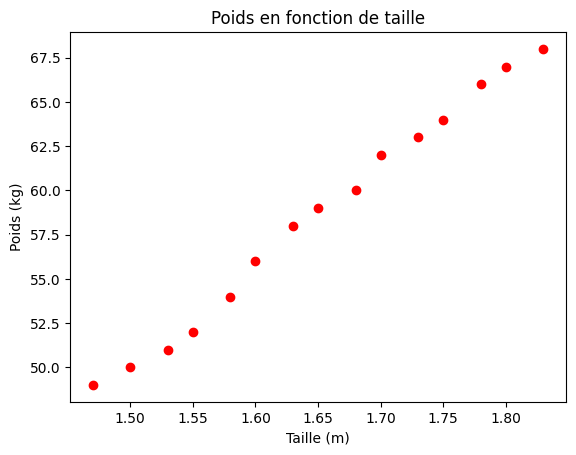

In [2]:
plt.close()

# data
#taille en mètres
x = [1.47, 1.50, 1.53, 1.55, 1.58, 1.60, 1.63, 1.65, 1.68, 1.70, 1.73, 1.75, 1.78, 1.80, 1.83] #Taille
y = [49.,50.,51.,52.,54.,56.,58.,59.,60.,62.,63.,64.,66.,67.,68.] #Poids

#print(X.shape)
#print(y.shape)


# plot the data
plt.scatter(x, y, color = 'red')
plt.title('Poids en fonction de taille')
plt.xlabel('Taille (m)')
plt.ylabel('Poids (kg)')

plt.show()





On voudrait approcher les données au mieux à l'aide d'une droite $y = a . x + b$.


Ici la fonction à minimiser est la fonction $E(a,b) = \sum_i(y_ i - (aX_i + b))^2$.


La fonction `plotDroite` affiche en rouge les données de coordonnées $(dataX[i], dataY[i])$  et, en bleu, la droite  $y = ax+b$

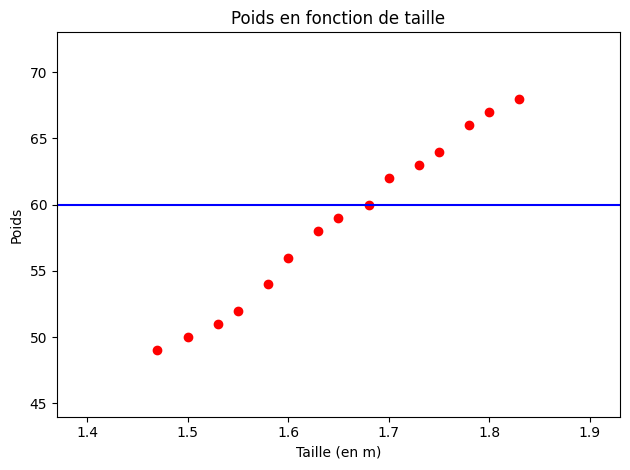

In [3]:
def plotDroite(dataX, dataY, a, b):
    
    # Representation des donnees x en fct de y
    plt.scatter(dataX, dataY, color='red')
    plt.title('Poids en fonction de taille')
    plt.xlabel('Taille (en m)')
    plt.ylabel('Poids')
    
    #Representation de la droite y=ax+b
    xinf=np.linspace(min(x) - 10, max(x) + 10,5)
    yinf=[a * i + b for i in xinf]
    
    plt.plot(xinf, yinf, color='blue')
    plt.ylim(min(y) -5, max(y) + 5)
    plt.xlim(min(x) -0.1, max(x) + 0.1)
    
    plt.tight_layout()

    plt.show()

plotDroite(x, y, 0, 60)

**Question 1** 

A l'aide des widgets, visualiser l'effet d'un changement de a et b. Arrivez-vous à trouver des valeurs de a et b qui permettent d'approcher les données ?

In [4]:
interact(plotDroite, dataX=fixed(x),dataY=fixed(y),a=(-80, 80, 0.5), b=(-50, 50, .1))

interactive(children=(FloatSlider(value=0.0, description='a', max=80.0, min=-80.0, step=0.5), FloatSlider(valu…

<function __main__.plotDroite(dataX, dataY, a, b)>

**Question 2** 

Nous avons vu en cours la formule pour calculer théoriquement les paramètres $a^*$ et $b^*$ optimaux pour la regression linéaire à partir du gradient de $E$.

1. Rappelez la formule de $a^*$ et $b^*$ trouvées en cours et utiliser Python pour calculer ces paramètres optimaux.

2. En déduire le poids théorique d'une personne de $1.77$m

3. Quelle est la valeur de l'erreur minimale $E(a^*,b^*)$ ?


Réponse 1. :


In [5]:
#Réponse 1.
#a* = y - ax = 34.5423
#b* = Cov(x) / Var(x, y) = 0.5638
#Réponse 2.
a = np.cov(x, y) / np.var(x)
b = np.mean(y) - a * np.mean(x)

print(a, b)


print("Poids d'une personne de 177 cm :", 177 * a + b)

#Réponse 3.
#sum(yi - (axi + b))**2
def sumSquaredDeviations(x, y):
    return (sum([((y[i] - (a * x[i] * 100 + b)) ** 2) for i in range(0, len(x))]))


print("Erreur minimale (somme des écarts au carré):", sumSquaredDeviations(x, y))

[[1.07142857e+00 6.04088030e+01]
 [6.04088030e+01 3.42828354e+03]] [[   56.83         -41.19534259]
 [  -41.19534259 -5604.92440663]]
Poids d'une personne de 177 cm : [[2.46472857e+02 1.06511628e+04]
 [1.06511628e+04 6.01201262e+05]]
Erreur minimale (somme des écarts au carré): [[4.61047322e+05 1.47053647e+09]
 [1.47053647e+09 4.73656979e+12]]


**Question 3**

1. Calculer théoriquement le gradient de la fonction de coût $E(a,b)$ (on pourra se reporter au cours)

2. Ecrire la fonction `gradReg(a,b,x,y)` qui retourne le gradient associé à la fonction de coût pour la regression linéaire.

3. Ecrire la fonction `graddes(dataX,dataY,a0,b0,k,d)` qui fait la descente de gradient et renvoie les valeurs de a et b après k pas.

Réponse 1. :
#TODO

In [6]:
def gradreg(a, b, x, y):
    """
    Retourne le gradient associé à la fonction d'erreur pour la regression linéaire
    """
    da = 0
    db = 0

    for i in range(len(x)):
        da += (-x[i] * (y[i] - (a * x[i] + b))) 
        db += (-(y[i] - (a * x[i] + b)))
    return (np.array([(2 * da) / len(x),(2*db) / len(x)]))


def graddes(dataX, dataY,a0,b0,k,d):
    """
    Algorithme de descente de gradient adapté au contexte de la régression linéaire
    """
    a = a0
    b = b0
    for i in range(k):
        grad=gradreg(a, b, dataX, dataY)
        a -= d * grad[0]
        b -= d * grad[1] 
    return (a, b)

graddes(x, y, a0 = 0, b0 = 1, k = 10000, d = 0.01)           

(40.111722113745884, -7.5786542501571335)

**Question 4** 

Ecrire une fonction `plotErrEtDroite(dataX,dataY,a0,b0,k,d)` qui trace la valeur de l'erreur $E(a,b)$ en fonction du temps (nombre de pas) et qui trace les données et la droite de régression obtenue après la descente de gradient sur le même graphe (utiliser <tt>plotDroite</tt>)

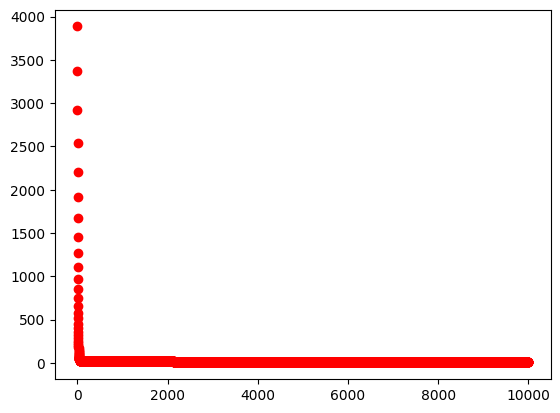

In [7]:
def plotErrEtDroite(dataX, dataY, a0 = 0, b0 = 1,k = 10, d = .01):
    err = []
    a = a0
    b = b0
    tmp = 0
    
    for i in range(k):
        grad = gradreg(a, b, dataX, dataY)
        a -= d * grad[0]
        b -= d * grad[1]
        for i in range(len(x)):
            tmp = (dataY[i] - (dataX[i] * a + b)) ** 2
        err.append(tmp)  
    
    plt.scatter(range(k), err, color = 'red')#Erreur en fonction du temps
    plt.show()


err = plotErrEtDroite(x, y, k = 10000)

**Question 5** 

Utiliser les widgets pour visualiser l'effet d'un changement de k et d.

In [8]:
from ipywidgets import interact, fixed
interact(plotErrEtDroite, dataX = fixed(x), dataY = fixed(y), a0=fixed(0), b0 = fixed(1), k=(0, 5000, 10),d = fixed(0.01))

interactive(children=(IntSlider(value=10, description='k', max=5000, step=10), Output()), _dom_classes=('widge…

<function __main__.plotErrEtDroite(dataX, dataY, a0=0, b0=1, k=10, d=0.01)>

**Question 6** Que ce passe-t-il si on fait la régression sur la taille en centimètres plutôt qu'en mètres. Expliquer. 

#TODO

**Question 7** Retrouver les résulats précédents à l'aide de la fonction  <tt> LinearRegression </tt> de <tt>sklearn.linear_model</tt>

In [10]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

X = np.array(x).reshape((-1, 1))

mylinear = LinearRegression().fit(X, y)
mylinear.predict(X)

array([48.33855799, 50.03000448, 51.72145096, 52.84908195, 54.54052844,
       55.66815943, 57.35960591, 58.4872369 , 60.17868339, 61.30631438,
       62.99776086, 64.12539185, 65.81683833, 66.94446932, 68.63591581])

### Extensions suggérées :


#### Améliorer la visualisation de l'évolution de la droite de regression au cours de l'algorithme  :

Vous pouvez tracer l'erreur ou utiliser un widget du même type que dans le TP1a :
from ipywidgets import interact, fixed
interact(...)




#### Normalisation


sklearn propose une option <tt> StandardScaler()</tt>, utilisée dans l'imense majorité des exemples disponible sur le net. Expliquer le fonctionnement et le but de cette option, et illustrer ses effets à l'aide d'exemples (on pourra utiliser des outils venant du cours de statisque R2.09 et du cours de probabilité R3.08)

#### Augmentation des dimensions
Utiliser la méthode du gradient pour étudier l'influence du nombre d'heures de travail et du nombre de machine par heure sur la production d'une entreprise, à partir des données suivantes :

| Objs        | Work (hours)           | Machine/hour  |   Production ( 100 tons) |
| ------------- |:-------------:| -----:|  -----:|
| 1     | 1100 |  300 | 60  |
| 2     | 1200 |  400 | 120  |
| 3     | 1430 |  420 | 190  |
| 4     | 1500 |  400 | 250  |
| 5     | 1520 |  510 | 300  |
| 6     | 1620 |  590 | 360  |
| 7     | 1800 |  600 | 380  |
| 8     | 1820 |  630 | 430  |
| 9     | 1800 |  610 | 440  |



On cherche donc a obtenir une formule du type :

$$P= \alpha_1 W + \alpha_2 Mh + \beta $$

Dont l'erreur est donnée par 

$$E(\alpha_1,\alpha_2,\beta) =  \sum_i (P_i - (\alpha_1W_i + \alpha_2Mh_i + \beta)$$


#### Gradient stochatisque (version regression linéaire)
L'idée est de ne pas calculer à chaque étape le gradient complet, mais seulement pour un exemple $(X_i,y_i) (choisie au hasard, ou selon un ordre prédéterminé)


<u>_Methode du gradient stochastique_</u>


_Inputs_   $X=(X_1,...,X_n), y=(y_1,...,y_n), [a_0,b_0] \in R^2$

 
Pour $k = 0, 1, ...$

1. Choisir un couple $X_i,y_i)$
2. Definir le nouveau point comme : $[a_{n+1},b_{n+1}] =  [a_{n+1},b_{n+1}]  - d [2a_{n+1}(a_nX_i + b_n -y_i),2(a_nX_i + b_n -y_i)]$ 


Fin

Implémenter cette méthode et la comparer avec la méthode standard avec des exemples.

